# ELM368 ÖDEV#7
## Adı Soyadı : Mahmut Safa BULAT
## Öğrenci No: 141024051

### Kütüphaneleri ekleme

In [2]:
import numpy as np                      
#mat. fonksiyonlarını kullanabilmek için gereken kütüphane.
import cmath as c                       
#complex sayılar için başka bir mat. kütüphanesi.
from matplotlib import pyplot as plt    
#plot (grafik çizdirme) fonksiyonlarını kullanmakak için gereken kütüphane.
import scipy.signal as sgnl
#fourier ve ters fourier kullanmak için gereken kütüphane
from scipy.fftpack import fft, ifft 
#düzgün grafik görüntülemek için gerekiyor.
%matplotlib notebook
#.csv dosyalarını okumak için gereken kütüphane
from scipy.io import loadmat
# z plane'de iş yapmak için kütüphane
import zplane

from numpy import pi as pi 
from numpy import sin as sin 
from numpy import cos as cos 
#pi sayısı, sin ve cos'u direkt pi, sin, cos olarak kullanmak için.

import warnings
warnings.simplefilter("ignore", np.ComplexWarning) 
#complex sayı hatalarını almamak için. ***
#*** bu işlem sonuçları etkilememektedir.

### Soru - 1

In [3]:
N=100                       #istendiği üzere 100noktalık indis tanımlıyoruz
w=np.linspace(0,2*pi,N)  #omegayı 0-2pi aralığında N noktalı aldık

#### TYPE-I Filter

Type-I filtre için; $\\ $
M : even(çift) ve h[n] simetrik olmalı. $\\ $
Soruda istendiği üzere (4 veya 5) M=4 seçiyoruz. $\\ $ 

<IPython.core.display.Javascript object>


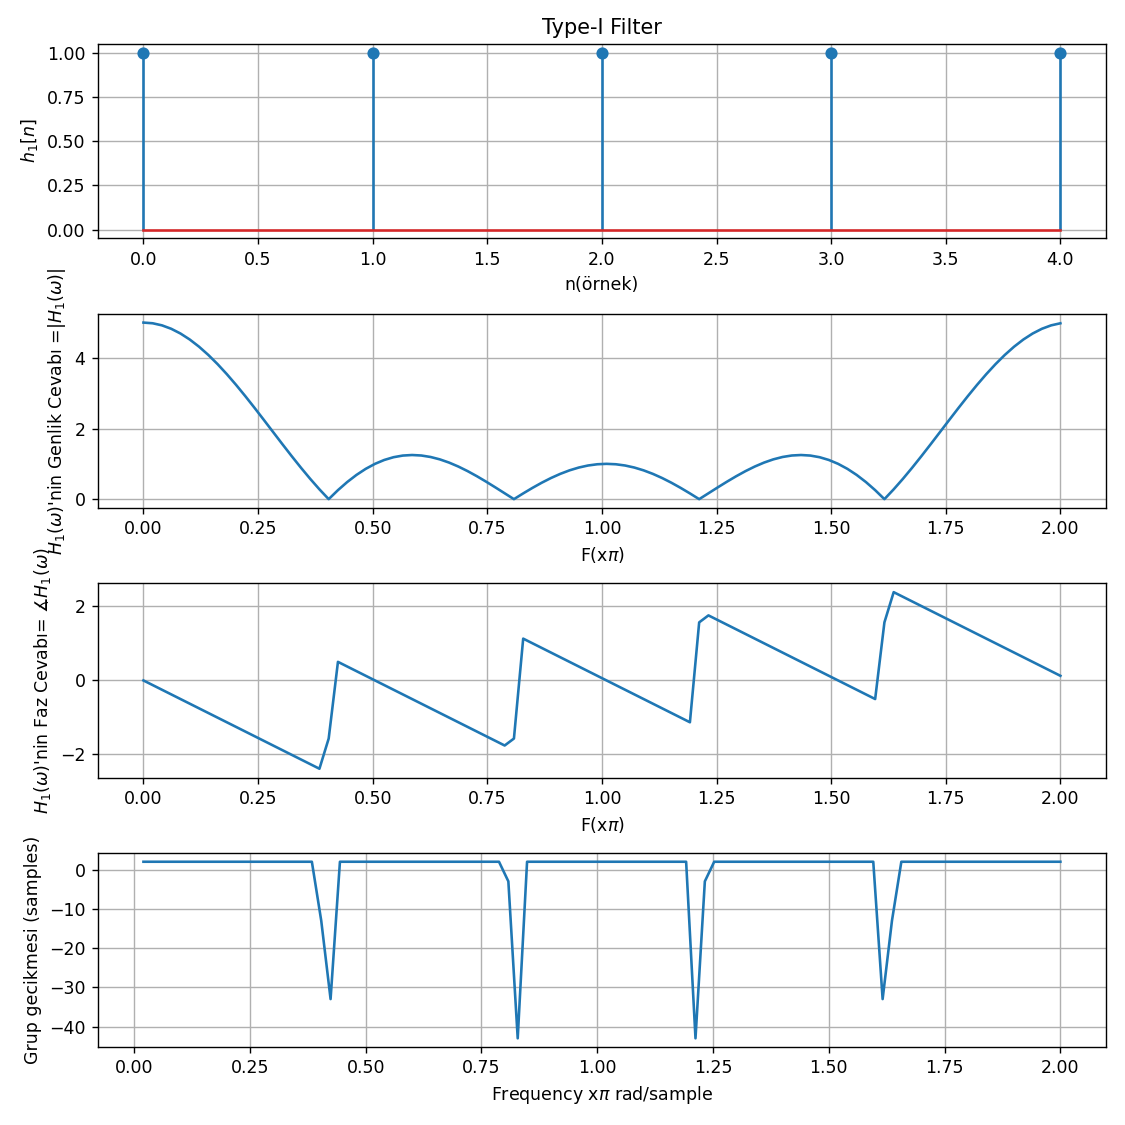

In [4]:
# type-I filtremizi oluşturalım;

M = 4
n = np.arange(0, M+1, 1)                  # M+1 noktada index vektörü
hn_1 = np.ones(len(n))                    # bu kadar noktada 1 olarak dürtü fonksiyonumuzu oluşturalım.
Hw_1 = fft(hn_1, N)                          # işaretimizin fourier dönüşümünü alalım.
Hw_abs = abs(Hw_1)                        # genlik
Hw_pha = np.unwrap(np.angle(Hw_1))        # ve fazını bulalım.
tau_w_1 = - np.diff(Hw_pha)*(N/(2*pi))    # grup gecikmesini föyde verildiği üzere hesaplatalım.

# type-I filtremizi çizdirelim;

plt.figure(figsize=(9,9)) # grafik boyutlarının ayarlanması

plt.subplot(411)   # filtremizin zaman domaininde çizdirilmesi
plt.stem(n, hn_1, use_line_collection=True)
plt.title("Type-I Filter")
plt.xlabel("n(örnek)")
plt.ylabel("$h_1[n]$")
plt.grid()

plt.subplot(412)   # genlik cevabının çizdirilmesi
plt.plot(w/pi,Hw_abs)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_1$($\omega$)'nin Genlik Cevabı =|$H_1$($\omega$)|")
plt.grid()

plt.subplot(413)   # faz cevabının çizdirilmesi
plt.plot(w/pi,Hw_pha)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_1$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H_1$($\omega$)")
plt.grid()

plt.subplot(414)   # grup gecikmesi diyagramının çizdirilmesi
plt.plot(w[1::]/pi, tau_w_1)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()
plt.tight_layout()

YORUM:$\\ $
    Oluşturup çizdirdiğimiz type-I filtrenin genlik cevabına bakarak ne iş yaptığını tahmin edecek olursak;
    Filtre alçak frekansları geçirirken 0.4pi ve bunun periyodiği olarak 1.6pi arasındaki yüksek bandlar diyebileceğimiz frekansları filtrelemektedir ve 0-0.4pi ve yine 1.6pi-2pi arasını düzgün geçirmektedir. Bunlardan yola çıkarak, bu filtreyi 0-pi arralığında "alçak geçiren filtre" ve 0-2pi aralığında "band sönümleyici filtre" olarak kullanabileceğimizi söyleyebiliriz.
    
   Yukarıdaki bu aralıklar dışında eğer filtreyi -pi ve pi aralığında çizdirseydik, düşük frekanslarda bir tepe olduğunu görecektik. 
    
   Tüm bu kriterleri düşündüğümüzde bu filtre tipini LPF, HPF, BPF ve BSF olarak kullanabileceğimizi yorumlayabiliriz. Yine bu yorumdan hareketle derste ve ön çalışmada gördüğümüz teorik tiplemelerle karşılaştıracak olursak, bu filtreye "type-I" filtre diyebiliriz. Ve bu noktada filtrenin lineer bir faza ve sabit bir grup gecikmesine sahip olduğunu söyleyebiliriz.
    
   Daha detaylı inceleme için sistemin kutup-sıfır diagramını çizdirelim;

<IPython.core.display.Javascript object>


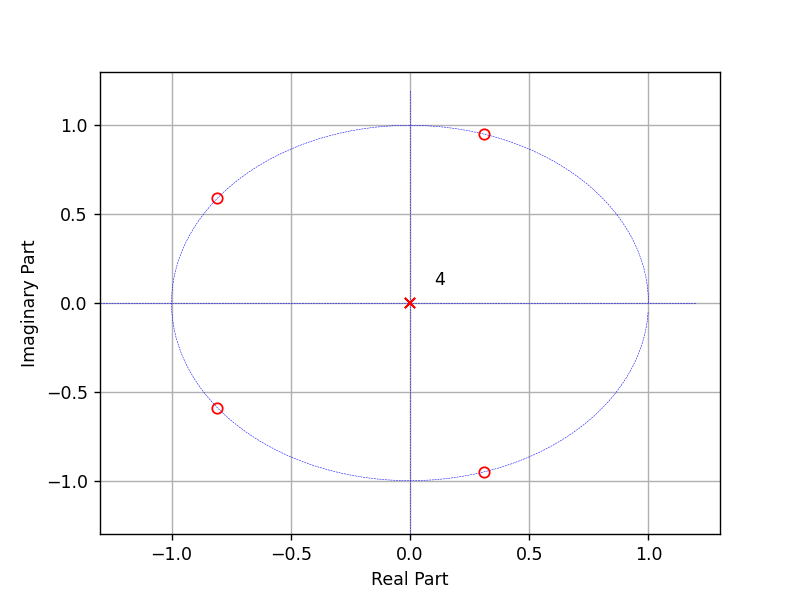

In [5]:
zplane.zplane(hn_1,1) # kutup-sıfır diagramını çizdirelim

YORUM:$\\ $
    Sistemimizde dört tane sıfır görüyoruz. Bu sıfır noktaları faz spektrumu ve grup gecikmesi grafiklerinde gördüğümüz  lineerliği bozan ve sıfıra giden kısımlara denk gelmektedir, bu durum kullanacağımız bu tür filtrelerde bazı sıkıntılara yol açar; sıfırın geldiği noktalar birim çemberin üzerindeyse bu yerlerde frekans uzayında genlik düşmeleri olacaktır, yani bu frekansları bastıracaktır ve bizi ideal bir "type-I" filtre yapısından uzaklaştıracaktır, çünkü ideal bir "type-I" filtresinde biz fazın tamamen lineer ve grup gecikmesinin tamamen sabit olmasını bekleriz.
    
   Kutuplara bakacak olursak tüm kutuplarımız orijindedir. Bu durum genlikte filtreye bir etki yaratmazken filtrenin faz cevabına doğrudan ve pozitif anlamda etki eder.
   
   Sonuç olarak, kutup sıfır diagramını genel bir yoruma tutar ve derste öğrendiklerimizle kıyaslayacak olursak, bu diagramın "type-I" filtre yapısına uyduğunu söyleyebilir, -1 ve 1 gibi (reel) noktalarda sıfır bulunmadığı için de LPF, HPF, BPF ve BSF olarak kullanılabileceğini bir kez daha söyleyebiliriz.

#### TYPE-II  Filter

Type-II filtre için; $\\ $
M : odd(tek) ve h[n] simetrik olmalı. $\\ $
Soruda istendiği üzere (4 veya 5) M=5 seçiyoruz. $\\ $ 

<IPython.core.display.Javascript object>


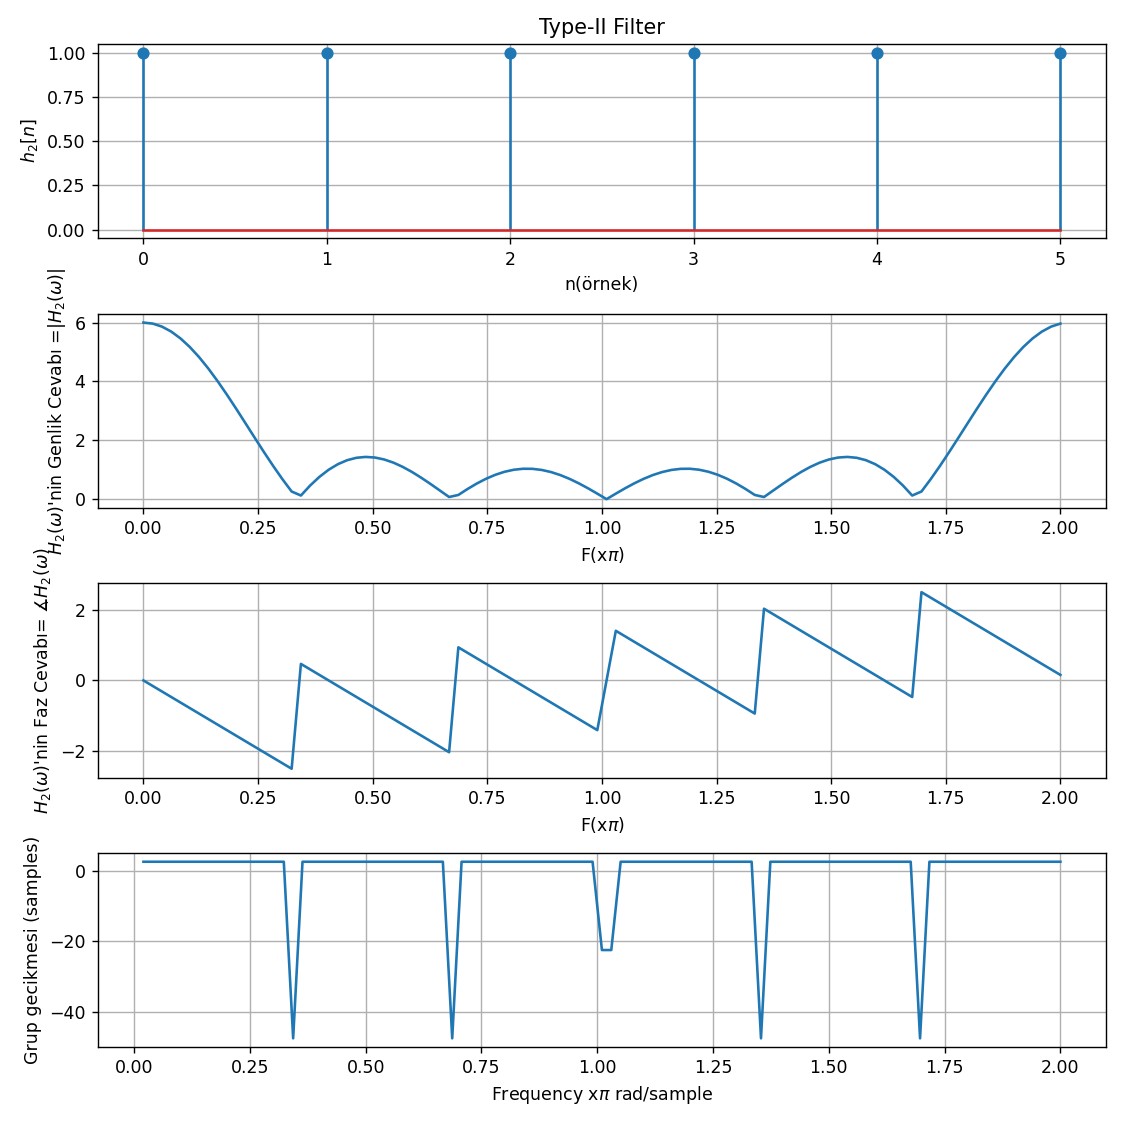

In [6]:
# type-II filtremizi oluşturalım;

M_2 = 5
n_2 = np.arange(0, M_2+1, 1)                  # M+1 noktada index vektörü
hn_2 = np.ones(len(n_2))                    # bu kadar noktada 1 olarak dürtü fonksiyonumuzu oluşturalım.
Hw_2 = fft(hn_2, N)                          # işaretimizin fourier dönüşümünü alalım.
Hw_abs_2 = abs(Hw_2)                        # genlik
Hw_pha_2 = np.unwrap(np.angle(Hw_2))        # ve fazını bulalım.
tau_w_2 = - np.diff(Hw_pha_2)*(N/(2*pi))    # grup gecikmesini föyde verildiği üzere hesaplatalım.

# type-II filtremizi çizdirelim;

plt.figure(figsize=(9,9)) # grafik boyutlarının ayarlanması

plt.subplot(411)   # filtremizin zaman domaininde çizdirilmesi
plt.stem(n_2, hn_2, use_line_collection=True)
plt.title("Type-II Filter")
plt.xlabel("n(örnek)")
plt.ylabel("$h_2[n]$")
plt.grid()

plt.subplot(412)   # genlik cevabının çizdirilmesi
plt.plot(w/pi,Hw_abs_2)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_2$($\omega$)'nin Genlik Cevabı =|$H_2$($\omega$)|")
plt.grid()

plt.subplot(413)   # faz cevabının çizdirilmesi
plt.plot(w/pi,Hw_pha_2)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_2$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H_2$($\omega$)")
plt.grid()

plt.subplot(414)   # grup gecikmesi diyagramının çizdirilmesi
plt.plot(w[1::]/pi, tau_w_2)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()
plt.tight_layout()

YORUM:$\\ $
    Oluşturup çizdirdiğimiz type-II filtrenin genlik cevabına bakarak ne iş yaptığını tahmin edecek olursak;
    Filtre alçak frekansları geçirirken 0.3pi ve bunun periyodiği olarak 1.7pi arasındaki yüksek bandlar diyebileceğimiz frekansları filtrelemektedir ve 0-0.4pi ve yine 1.6pi-2pi arasını düzgün geçirmektedir. Tip olarak bakacak olursak filtre yapısı "type-I" filtreye çok benzemektedir, fark olarak genlik spektrumunda dört adet düşük genlikli sallanma vardır (bekleyeceğimiz üzere M arttığı için düşük genlikli ripplelarda aynı oranda artış olmuştur.) Bunlardan yola çıkarak, bu filtreyi 0-pi arralığında "alçak geçiren filtre" ve 0-2pi aralığında "band sönümleyici filtre" olarak kullanabileceğimizi söyleyebiliriz.
    
   Yukarıdaki bu aralıklar dışında eğer filtreyi -pi ve pi aralığında çizdirseydik, düşük frekanslarda bir tepe olduğunu görecektik. 
    
   Tüm bu kriterleri düşündüğümüzde bu filtre tipini LPF ve BPF olarak kullanabileceğimizi yorumlayabiliriz. Bu sefer (type-II'de) filtreyi HPF ve BSF olarak kullanamayacağımızı derste görmüştük. Bunun sebebinin M' ile artan küçük genlikli sönümleyiciler olduğunu düşündüm. Yine bu yorumdan hareketle derste ve ön çalışmada gördüğümüz teorik tiplemelerle karşılaştıracak olursak, bu filtreye "type-II" filtre diyebiliriz. Ve bu noktada filtrenin lineer (not*) bir faza ve sabit bir grup gecikmesine sahip olduğunu söyleyebiliriz.
   
   Not*: Grup gecikmesi ve faz grafiklerini incelediğimizde yine lineerliği bozan veya sıfıra giden noktalar görüyoruz. Bu noktalar kutup-sıfır diagramını çizdiğimizde birim çember üzerinde sıfırlara denk gelecektir.
    
   Daha detaylı inceleme için sistemin kutup-sıfır diagramını çizdirelim;

<IPython.core.display.Javascript object>


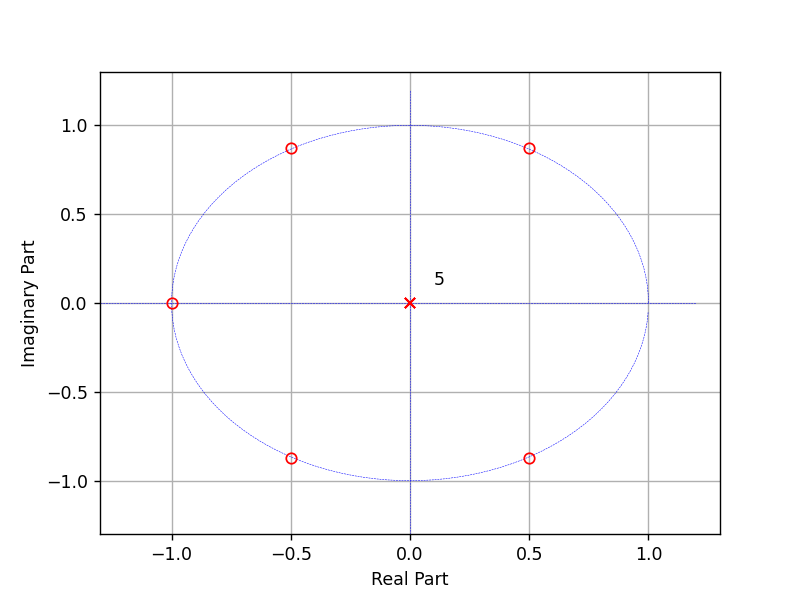

In [7]:
zplane.zplane(hn_2,1) # kutup-sıfır diagramını çizdirelim

YORUM:$\\ $
    Sistemimizde beşt tane ( M sayısınca ) sıfır görüyoruz. Bu sıfır noktaları faz spektrumu ve grup gecikmesi grafiklerinde gördüğümüz  lineerliği bozan ve sıfıra giden kısımlara denk gelmektedir, bu durum kullanacağımız bu tür filtrelerde bazı sıkıntılara yol açar; sıfırın geldiği noktalar birim çemberin üzerindeyse bu yerlerde frekans uzayında genlik düşmeleri olacaktır, yani bu frekansları bastıracaktır ve bizi ideal bir "type-II" filtre yapısından uzaklaştıracaktır, çünkü ideal bir "type-II" filtresinde biz fazın tamamen lineer ve grup gecikmesinin tamamen sabit olmasını bekleriz.
    
   Sıfır noktalarını detaylı bir şekilde inceleyecek olursak, z = -1 noktasında sıfır görürüz. Bu nokta frekans anlamında pi değerine karşılık gelecek olup en yüksek frekansımızı bastıracaktır. Bu durumda bu filtreyi "yüksek geçiren filtre" olarak kullanamayız ve aynı şekilde bu frekans değerindeki işareti bastıracağı için "bant geçiren filtre" olarakta kullanılamayız.

#### TYPE-III  Filter

Type-III filtre için; $\\ $
M : çift(even) ve h[n] anti-simetrik olmalı. $\\ $
Soruda istendiği üzere (4 veya 5) M=4 seçiyoruz. $\\ $ 

<IPython.core.display.Javascript object>


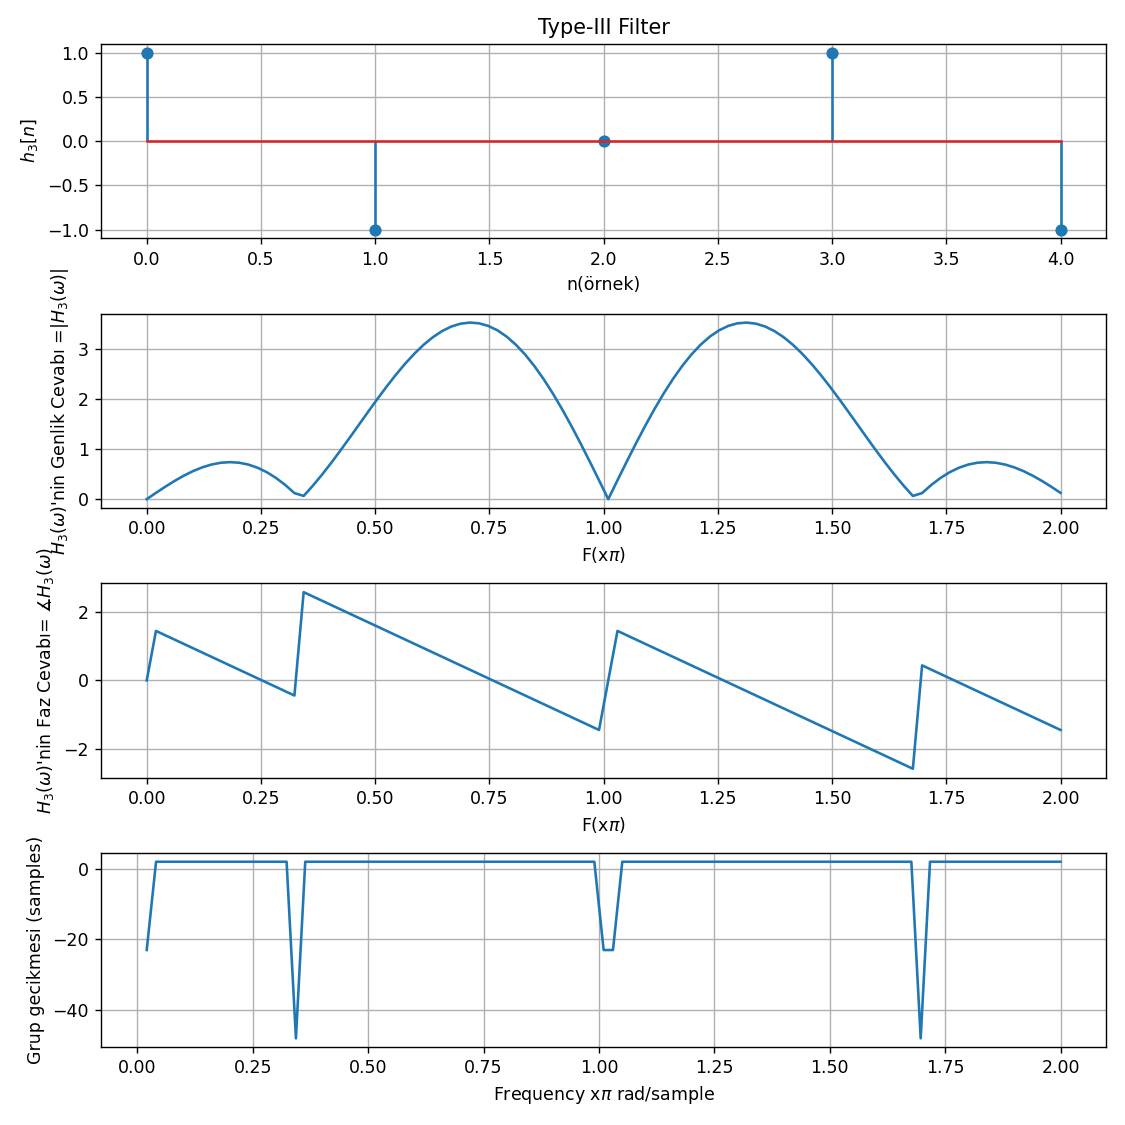

In [8]:
# burada h[n]'imizin anti simetrik olmasını istediğimiz için
# array olarak tanımlamak daha kolay olacaktır.

# type-III filtremizi oluşturalım;

M_3 = 4
n_3 = np.arange(0, M_3+1, 1)                  # M+1 noktada index vektörü
hn_3 = np.array([1,-1,0,1,-1])                # bu kadar noktada 1 olarak dürtü fonksiyonumuzu oluşturalım.
Hw_3 = fft(hn_3, N)                          # işaretimizin fourier dönüşümünü alalım.
Hw_abs_3 = abs(Hw_3)                        # genlik
Hw_pha_3 = np.unwrap(np.angle(Hw_3))        # ve fazını bulalım.
tau_w_3 = - np.diff(Hw_pha_3)*(N/(2*pi))    # grup gecikmesini föyde verildiği üzere hesaplatalım.

# type-III filtremizi çizdirelim;

plt.figure(figsize=(9,9)) # grafik boyutlarının ayarlanması

plt.subplot(411)   # filtremizin zaman domaininde çizdirilmesi
plt.stem(n_3, hn_3, use_line_collection=True)
plt.title("Type-III Filter")
plt.xlabel("n(örnek)")
plt.ylabel("$h_3[n]$")
plt.grid()

plt.subplot(412)   # genlik cevabının çizdirilmesi
plt.plot(w/pi,Hw_abs_3)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_3$($\omega$)'nin Genlik Cevabı =|$H_3$($\omega$)|")
plt.grid()

plt.subplot(413)   # faz cevabının çizdirilmesi
plt.plot(w/pi,Hw_pha_3)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_3$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H_3$($\omega$)")
plt.grid()

plt.subplot(414)   # grup gecikmesi diyagramının çizdirilmesi
plt.plot(w[1::]/pi, tau_w_3)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()
plt.tight_layout()

YORUM:$\\ $
    Oluşturup çizdirdiğimiz type-III filtrenin genlik cevabına bakarak ne iş yaptığını tahmin edecek olursak;
    Bu filtre tipinde direkt olarak gözüme alçak frekansların filtrelenmesi çarpıyor, buradan rahatlıkla bu filtre tipini "alçak geçiren filtre" olarak kullanamayacağımızı yorumlayabiliriz. Diğer bir yandan pi ve 2pi çevresindeki yüksek frekanslarda genliği oldukça fazladır buradan deriz ki bu filtreyi bu aralıklarda (bu bandları rahat geçireceğinden) "band geçiren filtre" olarak kullanabiliriz. Yaklaşık değerlerle band olarak yorumlayacak olursak pi-1.6pi aralığında geçirme bandı olarak yorumlayabiliriz. Son olarak genlik spektrumunda tam pi ve 2pi noktalarında genliğin sıfıra yakınsadığını görüyoruz. Maximum frekansımız tam bu noktalarda olacaktır ve filtre bu frekansları bastıracaktır, bu sebeple bu filtre yapısını "yüksek geçiren filtre" olarak kullanamayız. 
    
   Tüm bu kriterleri düşündüğümüzde bu filtre tipini sadece BPF olarak kullanabileceğimizi yorumlayabiliriz. Yine bu yorumdan hareketle derste ve ön çalışmada gördüğümüz teorik tiplemelerle karşılaştıracak olursak, bu filtreye "type-III" filtre diyebiliriz. Ve bu noktada filtrenin lineer bir faza ve sabit bir grup gecikmesine sahip olduğunu söyleyebiliriz.
   
   Not: Yine M=4 için 4 tane kritik noktamız vardır bu noktalar birim çember üzerinde ki sıfırlara denk gelir. 
    
   Daha detaylı inceleme için sistemin kutup-sıfır diagramını çizdirelim;

<IPython.core.display.Javascript object>


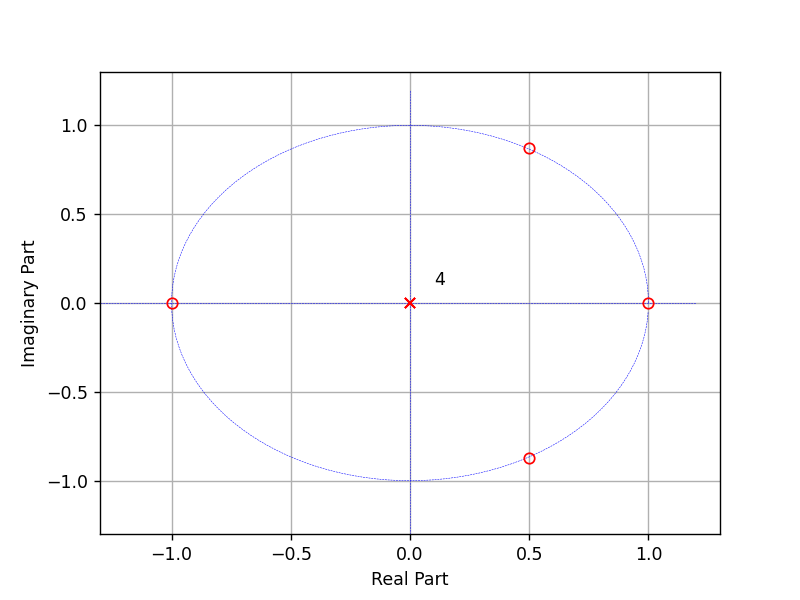

In [9]:
zplane.zplane(hn_3,1) # kutup-sıfır diagramını çizdirelim

YORUM:$\\ $
    Birim çembere konan sıfırlar, o frekansı bastıracaktır. Görüyoruzki Type-III filtremizin z=-1 ve z=1 de sıfırları mevcuttur. z=-1 noktası bizim için 𝜋 değerine karşılık gelmektedir. z=-1 de bulunan sıfır genlik cevabında incelediğimizde 𝜋 frekansında bulunan işaretimizi bastıracağını söyleyebiliriz. z=1 de bulunan sıfır ise 0 frekans değerine karşıklık gelecek ve oradakaki işaretimizin bastıracaktır. Bu nedenlerden dolayı Type-III filtremiz alçak geçiren, yüksek geçiren ve bant söndüren filtre olarak kullanılamaz.

#### TYPE-IV  Filter

Type-IV filtre için; $\\ $
M : tek(odd) ve h[n] anti-simetrik olmalı. $\\ $
Soruda istendiği üzere (4 veya 5) M=5 seçiyoruz. $\\ $ 

<IPython.core.display.Javascript object>


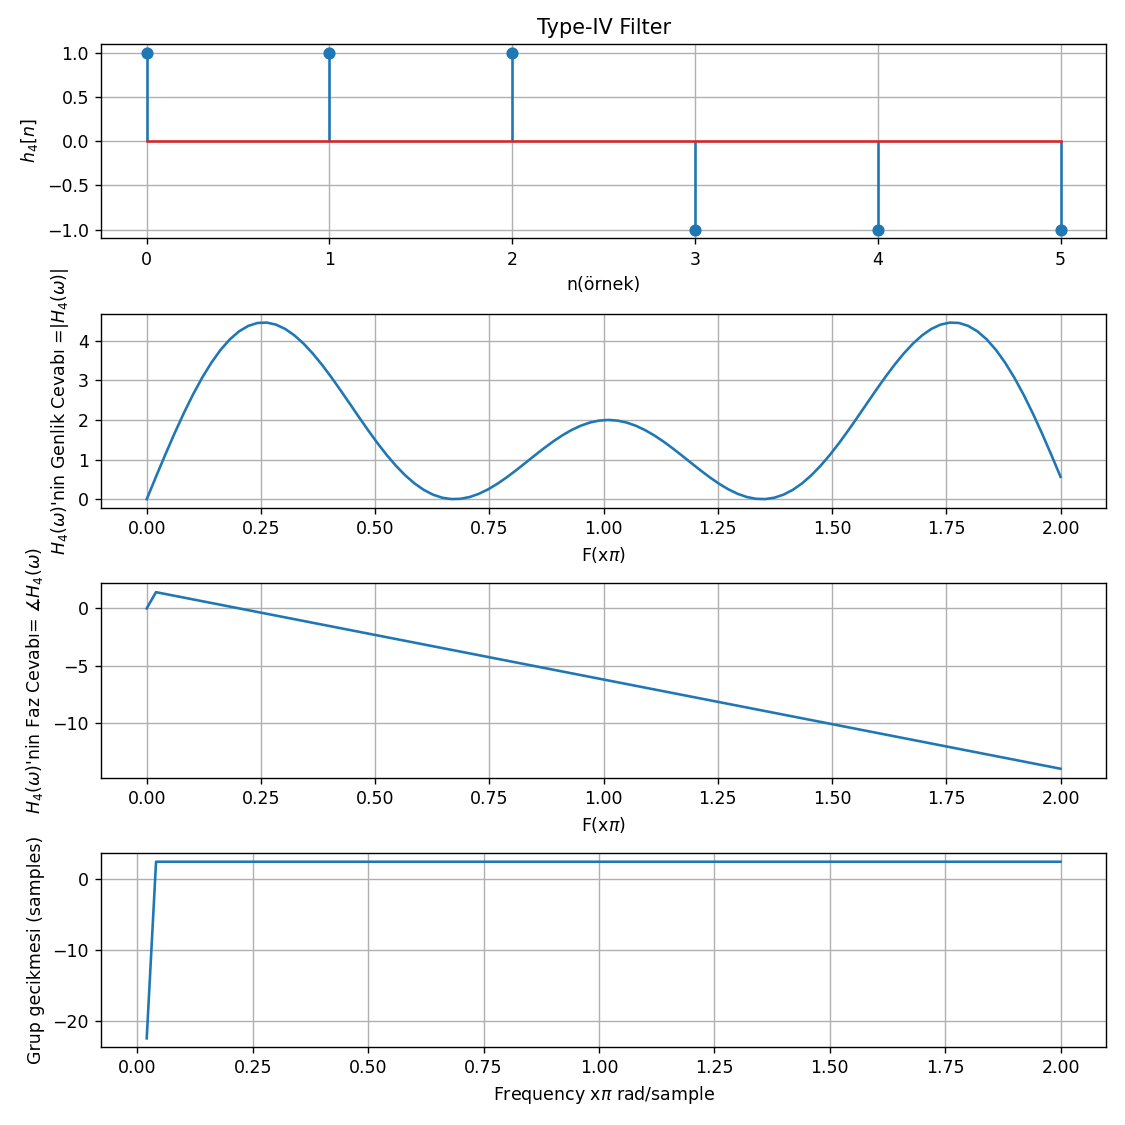

In [10]:
# burada h[n]'imizin anti simetrik olmasını istediğimiz için
# array olarak tanımlamak daha kolay olacaktır.

# type-IV filtremizi oluşturalım;

M_4 = 5
n_4 = np.arange(0, M_4+1, 1)                  # M+1 noktada index vektörü
hn_4 = np.array([1,1,1,-1,-1,-1])                # bu kadar noktada 1 olarak dürtü fonksiyonumuzu oluşturalım.
Hw_4 = fft(hn_4, N)                          # işaretimizin fourier dönüşümünü alalım.
Hw_abs_4 = abs(Hw_4)                        # genlik
Hw_pha_4 = np.unwrap(np.angle(Hw_4))        # ve fazını bulalım.
tau_w_4 = - np.diff(Hw_pha_4)*(N/(2*pi))    # grup gecikmesini föyde verildiği üzere hesaplatalım.

# type-IV filtremizi çizdirelim;

plt.figure(figsize=(9,9)) # grafik boyutlarının ayarlanması

plt.subplot(411)   # filtremizin zaman domaininde çizdirilmesi
plt.stem(n_4, hn_4, use_line_collection=True)
plt.title("Type-IV Filter")
plt.xlabel("n(örnek)")
plt.ylabel("$h_4[n]$")
plt.grid()

plt.subplot(412)   # genlik cevabının çizdirilmesi
plt.plot(w/pi,Hw_abs_4)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_4$($\omega$)'nin Genlik Cevabı =|$H_4$($\omega$)|")
plt.grid()

plt.subplot(413)   # faz cevabının çizdirilmesi
plt.plot(w/pi,Hw_pha_4)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_4$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H_4$($\omega$)")
plt.grid()

plt.subplot(414)   # grup gecikmesi diyagramının çizdirilmesi
plt.plot(w[1::]/pi, tau_w_4)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()
plt.tight_layout()

YORUM:$\\ $
    Oluşturup çizdirdiğimiz type-IV filtrenin genlik cevabına bakarak ne iş yaptığını tahmin edecek olursak;
    Filtre alçak frekansları bir yandan bastırırken, orta bandları iyi bir şekilde bastırıyor. Bunun yanında gain olarak biraz düşük olsa bile yüksek frekansları geçirdiğini söyleyebiliriz. Buradan bu filtreyi "yüksek geçiren filtre" ve "band geçiren filtre" olarak kullanabiliriz gibi görünüyor. Kutup-sıfır diagramanıa bakarak durumu netleştirelim.

   Yine bu yorumdan hareketle derste ve ön çalışmada gördüğümüz teorik tiplemelerle karşılaştıracak olursak, bu filtreye "type-IV" filtre diyebiliriz. Ve bu noktada filtrenin lineer bir faza ve sabit bir grup gecikmesine sahip olduğunu söyleyebiliriz.
    
   Daha detaylı inceleme için sistemin kutup-sıfır diagramını çizdirelim;

<IPython.core.display.Javascript object>


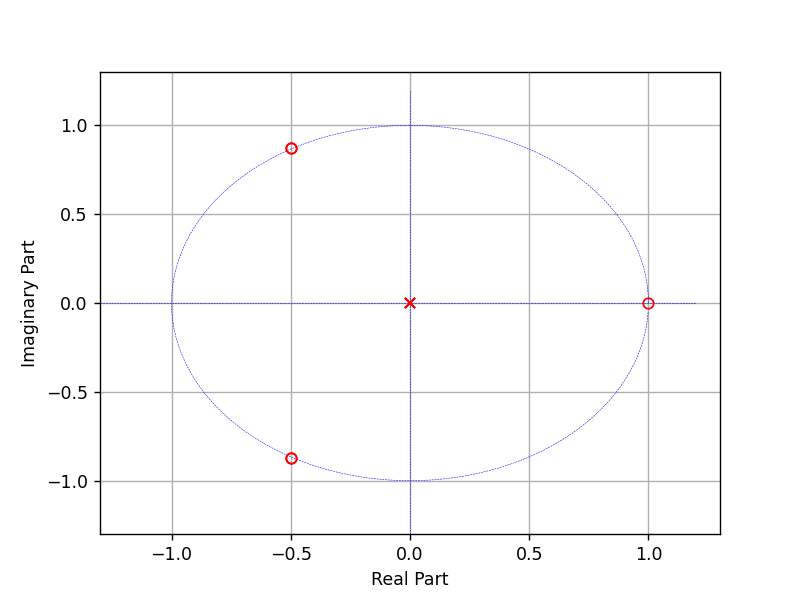

In [11]:
zplane.zplane(hn_4,1) # kutup-sıfır diagramını çizdirelim

YORUM:$\\ $
    Sistemimizde diğerlerinden farklı olarak üç tane sıfır görüyoruz ve bu sefer bir adet kutpumuz mevcut. Type-IV filtremiz 0 frekans değerinde bir 0 a sahip yani bu frekans değerine karşılık gelen noktamız z=1 de sıfır vardır. Dolayısıyla alçak geçiren ve bant söndüren bir filtre olarak kullanılmaya uygun bir filtre olmadığını söyleyebiliriz.
   
   Sonuç olarak, kutup sıfır diagramını genel bir yoruma tutar ve derste öğrendiklerimizle kıyaslayacak olursak, bu diagramın "type-IV" filtre yapısına uyduğunu söyleyebilir.

### Soru - 2, FIR filters

#### 1. Equiripple - Lowpass Filter (FIR)

N = 100

F_pb = 0.25pi, A_pb = 3 dB

F_sb = 0.35pi, A_sb = 10 dB

filter at -pi/2 , pi/2 

#### 1_2. Equiripple - Bandpass Filter (FIR)

N = 100

F_pb = 0.2pi

F_sb = 0.1pi

filter at -pi/2 , pi/2 


<IPython.core.display.Javascript object>


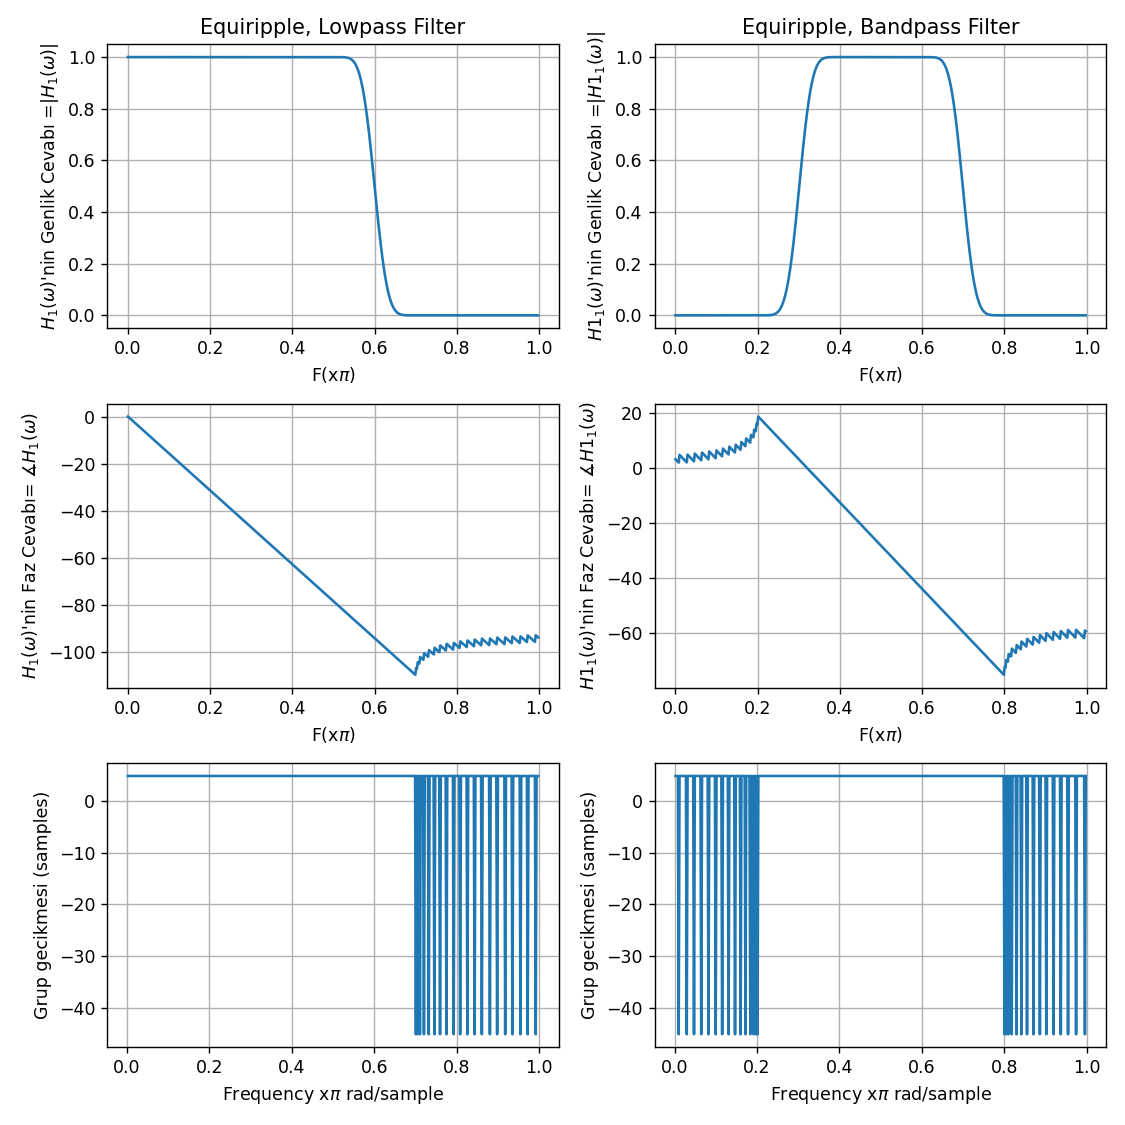

In [29]:
# oluşturduğumuz filtreyi projede açalım;
E_LPF = loadmat("2_1_Equiripple_LPF.mat")              #-Lowpass equiripple
E_BPF = loadmat("2_1_1_Equiripple_BPF.mat")            #-Bandpass equiripple
# katsayılarını alalım (float olarak)
Float_coef = E_LPF["ba"].astype(np.float)             #-Lowpass equiripple
Float_coef_1 = E_BPF["ba"].astype(np.float)           #-Bandpass equiripple

b_1 = Float_coef[0,:]                                 #-Lowpass equiripple
b_1_1 = Float_coef_1[0,:]                             #-Bandpass equiripple

N = 100

#lowpass filteri oluşturalım;
w_1, Hw_1=sgnl.freqz(b_1)              #w domaini ve filtre
Hw_1_abs=abs(Hw_1)                  #genlik cevabı 
Hw_1_pha=np.unwrap(np.angle(Hw_1))  #faz cevabı
tau_w_1= -np.diff(Hw_1_pha)*(N/(2*pi)) #grup gecikmesi
#bandpass filteri oluşturalım;
w_1_1, Hw_1_1=sgnl.freqz(b_1_1)              #w domaini ve filtre
Hw_1_abs_1=abs(Hw_1_1)                  #genlik cevabı 
Hw_1_pha_1=np.unwrap(np.angle(Hw_1_1))  #faz cevabı
tau_w_1_1= -np.diff(Hw_1_pha_1)*(N/(2*pi)) #grup gecikmesi

# filtreleri çizdirelim
plt.figure(figsize=(9,9)) # grafik boyutlarının ayarlanması

plt.subplot(321)   # genlik cevabının çizdirilmesi
plt.plot(w_1/pi,Hw_1_abs)
plt.title("Equiripple, Lowpass Filter")
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_1$($\omega$)'nin Genlik Cevabı =|$H_1$($\omega$)|")
plt.grid()

plt.subplot(323)   # faz cevabının çizdirilmesi
plt.plot(w_1/pi,Hw_1_pha)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_1$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H_1$($\omega$)")
plt.grid()

plt.subplot(325)   # grup gecikmesi diyagramının çizdirilmesi
plt.plot(w_1[1::]/pi, tau_w_1)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()
#******************************************************************************
plt.subplot(322)   # genlik cevabının çizdirilmesi
plt.plot(w_1_1/pi,Hw_1_abs_1)
plt.title("Equiripple, Bandpass Filter")
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H1_1$($\omega$)'nin Genlik Cevabı =|$H1_1$($\omega$)|")
plt.grid()

plt.subplot(324)   # faz cevabının çizdirilmesi
plt.plot(w_1_1/pi,Hw_1_pha_1)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H1_1$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H1_1$($\omega$)")
plt.grid()

plt.subplot(326)   # grup gecikmesi diyagramının çizdirilmesi
plt.plot(w_1_1[1::]/pi, tau_w_1_1)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()
plt.tight_layout()

YORUM ve ANALİZ:
Soruda istenen iki filtre yapısından birtanesini "equiripple" yöntemiyle ve "alçak geçiren filtre" olacak şekilde seçtim. Burada kullandığım N filtre derecesi ve kesim frekansı gibi değerler filtre başlığında verilmiştir.
    
Bu değerleri göz önüne alacak olursak, ve -pi/2 ve pi/2 aralığında (F=f/fs=omega/2𝜋) olarak çalıştığımızı düşünürsek;

Kesim frekansımız 0.25pi olarak seçilmişti, bu yüzden 0.5pi de filtrenin artık kesmeye geçtiğini ve genliğinin düşmeye başladığını görüyoruz. Aynı şekilde bu azalmanın sınırlandırmasını 0.35pi değerinde yapmıştık bundan dolayı da 0.7pi değerinde filtre tam olarak sönümleme bölgesine geçiş yapmıştır ve bu bölgeden sonraki işaretlerin hepsi filtrelenmiş olacaktır. Bunun yanında filtremizin genliği 1 olduğu için, giriş işaretinin genliğinin çıkışta değişmemesini beklemekteyim.

Faz ve Grup gecikmesi grafiklerini inceleyecek olursak, Fazımız lineer ve grup gecikmemiz sabittir. Bunun anlamı tüm frekanslarda örnekler aynı şekilde gecikecektir. Grup gecikmesinin genliğine bakarsak, oluşacak olan gecikmenin de 50 örnek olması gerektiğini söyleriz.

Ekstra olarak bu filtrede filtre derecesini N = 100 olarak seçtim. N derecesi arttıkça filtre ideale yaklaşmaktadır. Ama bununla birlikte işlem yükü artar bu da grup gecikmesini arttıracaktır.  

#### 2. Windowed FIR - Bandpass Filter (FIR)

N = 100

F_pb = 0.5pi, A_pb = 3 dB

F_sb = 0.2pi, A_sb = 10 dB

filter at -pi/2 , pi/2 

Fc = 0.2pi, Fc_2 = 0.5pi

#### 2_2. Windowed FIR - Lowpass Filter (FIR)

N = 100

A_pb = 3 dB

A_sb = 60 dB

filter at -pi/2 , pi/2 

Fc = 0.3pi

<IPython.core.display.Javascript object>


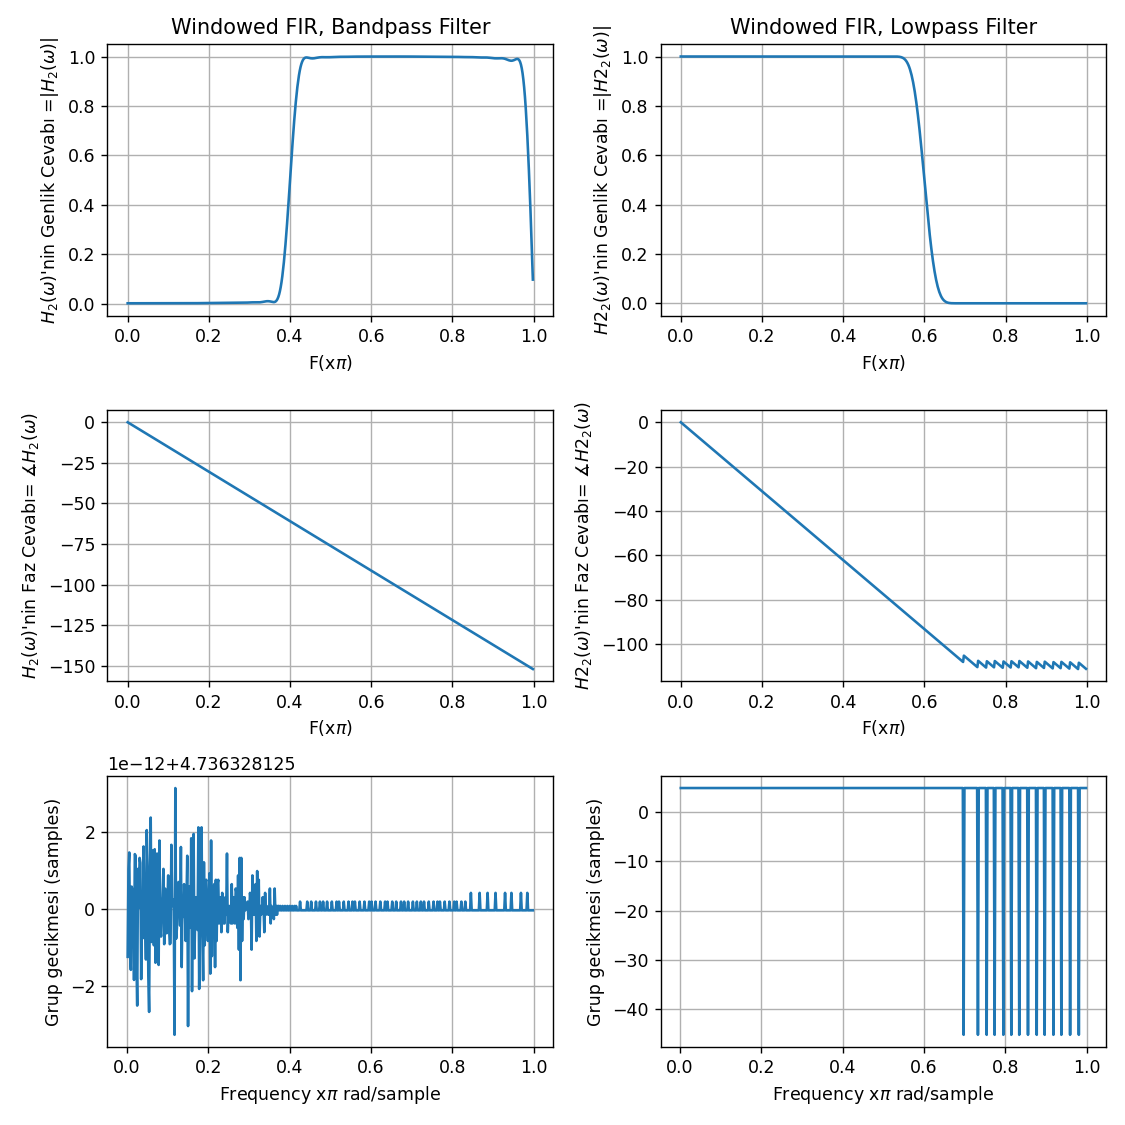

In [32]:
# oluşturduğumuz filtreyi projede açalım;
WF_BPF = loadmat("2_2_WindowedFIR_BPF.mat")
WF_LPF = loadmat("2_2_2_WindowedFIR_LPF.mat")
# katsayılarını alalım (float olarak)
Float_coef_2 = WF_BPF["ba"].astype(np.float)
Float_coef_2_2 = WF_LPF["ba"].astype(np.float)

b_2 = Float_coef_2[0,:]
b_2_2 = Float_coef_2_2[0,:]
N_2 = 100

w_2, Hw_2=sgnl.freqz(b_2)              #w domaini ve filtre
Hw_2_abs=abs(Hw_2)                  #genlik cevabı 
Hw_2_pha=np.unwrap(np.angle(Hw_2))  #faz cevabı
tau_w_2= -np.diff(Hw_2_pha)*(N_2/(2*pi)) #grup gecikmesi

w_2_2, Hw_2_2=sgnl.freqz(b_2_2)              #w domaini ve filtre
Hw_2_abs_2=abs(Hw_2_2)                  #genlik cevabı 
Hw_2_pha_2=np.unwrap(np.angle(Hw_2_2))  #faz cevabı
tau_w_2_2= -np.diff(Hw_2_pha_2)*(N_2/(2*pi)) #grup gecikmesi

# filtreyi çizdirelim
plt.figure(figsize=(9,9)) # grafik boyutlarının ayarlanması

plt.subplot(321)   # genlik cevabının çizdirilmesi
plt.plot(w_2/pi,Hw_2_abs)
plt.title("Windowed FIR, Bandpass Filter")
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_2$($\omega$)'nin Genlik Cevabı =|$H_2$($\omega$)|")
plt.grid()

plt.subplot(323)   # faz cevabının çizdirilmesi
plt.plot(w_2/pi,Hw_2_pha)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_2$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H_2$($\omega$)")
plt.grid()

plt.subplot(325)   # grup gecikmesi diyagramının çizdirilmesi
plt.plot(w_2[1::]/pi, tau_w_2)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()
#*************************************************************************************
plt.subplot(322)   # genlik cevabının çizdirilmesi
plt.plot(w_2_2/pi,Hw_2_abs_2)
plt.title("Windowed FIR, Lowpass Filter")
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H2_2$($\omega$)'nin Genlik Cevabı =|$H2_2$($\omega$)|")
plt.grid()

plt.subplot(324)   # faz cevabının çizdirilmesi
plt.plot(w_2_2/pi,Hw_2_pha_2)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H2_2$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H2_2$($\omega$)")
plt.grid()

plt.subplot(326)   # grup gecikmesi diyagramının çizdirilmesi
plt.plot(w_2_2[1::]/pi, tau_w_2_2)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()
plt.tight_layout()

YORUM ve ANALİZ:
Soruda istenen iki filtre yapısından diğerini de "windowed FIR" yöntemiyle ve "band geçiren filtre" olacak şekilde seçtim. Burada kullandığım N filtre derecesi ve kesim frekansı gibi değerler filtre başlığında verilmiştir.
    
Aynı şekilde bu değerleri göz önüne alacak olursak, ve -pi/2 ve pi/2 aralığında (F=f/fs=omega/2𝜋) olarak çalıştığımızı düşünürsek;

Genlik spektrumuna baktığımızda; band frekanslarını 0.2pi ve 0.5pi olarak seçmiştim, bu yüzden filtrenin 0.4pi ve pi de sinyalleri geçirirken, kalan yerlerde filtreleme yapmasını bekleriz. Bunun yanında filtremizin genliği 1 olduğu için, giriş işaretinin genliğinin çıkışta değişmemesini beklemekteyim.

Faz ve Grup gecikmesi grafiklerini inceleyecek olursak, temel anlamda fazımız lineer ve grup gecikmemiz sabittir. Bunun anlamı tüm frekanslarda örnekler aynı şekilde gecikecektir. Burada bazı kısımlarda filtrelerimizin (ikisi için de) tam olarak ideal olmadığından grup gecikmeleri olan bölgeleri olduğunu görüyoruz, buralarda oluşan sapma değerleri 10^-12 mertebesindedir ve ihmal edilecek düzeydedir. Grup gecikmesinin genliğine bakarsak, oluşacak olan gecikmenin de yine 50 örnek olması ve yine filtrenin genliğine bakarak giriş işaretinin genliğinin korunması gerektiğini söyleriz.

### Soru - 3, IIR filters 

#### 3. Butterworth - Lowpass Filter (IIR)

N = 10

filter at -pi/2 , pi/2 

Fc = 0.2pi

#### 3_3. Butterworth - Highpass Filter (IIR)

N = 10

filter at -pi/2 , pi/2 

Fc = 0.2pi

<IPython.core.display.Javascript object>


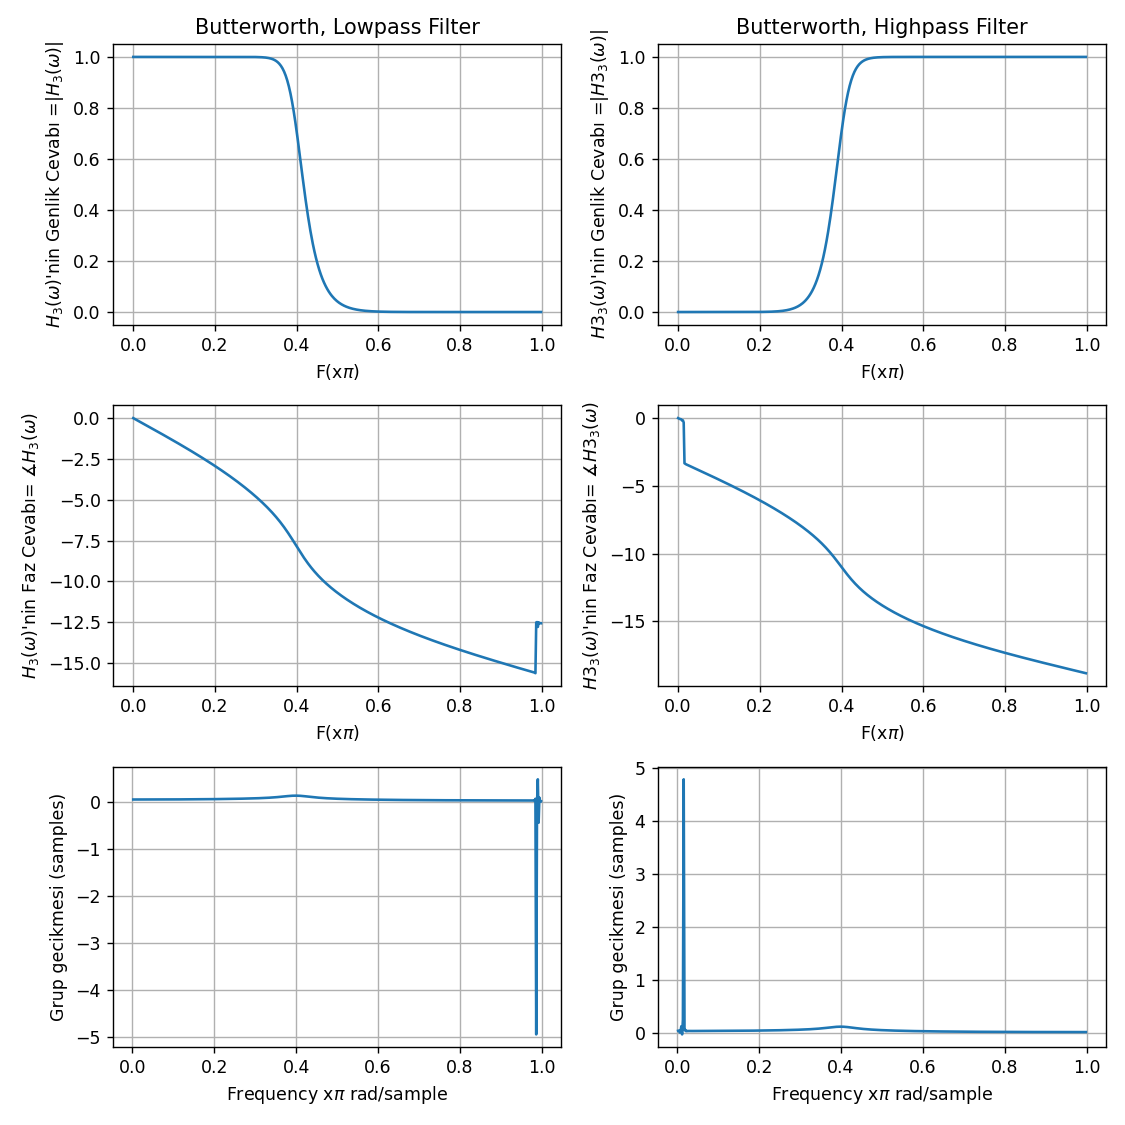

In [34]:
# oluşturduğumuz filtreyi projede açalım;
B_LPF = loadmat("3_1_Butterworth_LPF.mat")
B_HPF = loadmat("3_1_3_Butterworth_HPF.mat")
# katsayılarını alalım (float olarak)
Float_coef_3 = B_LPF["ba"].astype(np.float)
Float_coef_3_3 = B_HPF["ba"].astype(np.float)

b_3 = Float_coef_3[0,:]
a_3 = Float_coef_3[1,:]

b_3_3 = Float_coef_3_3[0,:]
a_3_3 = Float_coef_3_3[1,:]

N_3 = 10

w_3, Hw_3=sgnl.freqz(b_3, a_3)      #w domaini ve filtre
Hw_3_abs=abs(Hw_3)                  #genlik cevabı 
Hw_3_pha=np.unwrap(np.angle(Hw_3))  #faz cevabı
tau_w_3= -np.diff(Hw_3_pha)*(N_3/(2*pi)) #grup gecikmesi

w_3_3, Hw_3_3=sgnl.freqz(b_3_3, a_3_3)      #w domaini ve filtre
Hw_3_abs_3=abs(Hw_3_3)                  #genlik cevabı 
Hw_3_pha_3=np.unwrap(np.angle(Hw_3_3))  #faz cevabı
tau_w_3_3= -np.diff(Hw_3_pha_3)*(N_3/(2*pi)) #grup gecikmesi

# filtreyi çizdirelim
plt.figure(figsize=(9,9)) # grafik boyutlarının ayarlanması

plt.subplot(321)   # genlik cevabının çizdirilmesi
plt.plot(w_3/pi,Hw_3_abs)
plt.title("Butterworth, Lowpass Filter")
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_3$($\omega$)'nin Genlik Cevabı =|$H_3$($\omega$)|")
plt.grid()

plt.subplot(323)   # faz cevabının çizdirilmesi
plt.plot(w_3/pi,Hw_3_pha)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_3$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H_3$($\omega$)")
plt.grid()

plt.subplot(325)   # grup gecikmesi diyagramının çizdirilmesi
plt.plot(w_3[1::]/pi, tau_w_3)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()
#**********************************************************************************************************
plt.subplot(322)   # genlik cevabının çizdirilmesi
plt.plot(w_3_3/pi,Hw_3_abs_3)
plt.title("Butterworth, Highpass Filter")
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H3_3$($\omega$)'nin Genlik Cevabı =|$H3_3$($\omega$)|")
plt.grid()

plt.subplot(324)   # faz cevabının çizdirilmesi
plt.plot(w_3_3/pi,Hw_3_pha_3)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H3_3$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H3_3$($\omega$)")
plt.grid()

plt.subplot(326)   # grup gecikmesi diyagramının çizdirilmesi
plt.plot(w_3_3[1::]/pi, tau_w_3_3)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()
plt.tight_layout()

YORUM ve ANALİZ:
Soruda istenen iki filtre yapısından diğerini de "butterworth" yöntemiyle ve "alçak geçiren filtre" olacak şekilde seçtim. Burada kullandığım N filtre derecesi ve kesim frekansı gibi değerler filtre başlığında verilmiştir.
    
Aynı şekilde bu değerleri göz önüne alacak olursak, ve -pi/2 ve pi/2 aralığında (F=f/fs=omega/2𝜋) olarak çalıştığımızı düşünürsek;

Genlik spektrumuna baktığımızda; kesim frekansımız 0.2pi seçildiği için biz bu değeri genlik cevabımızda 0.4pi ye karşılık geleceğini görmemiz gerekiyor. Genlik cevabımız incelendiğinde bu değeri görüyoruz. 0-0.4pi aralığındaki frekans değerlerini geçireceğini bunun dışında kalan değerleri ise söndüreceğini görüyoruz. Genlik değerimizi 0-0.4pi aralığına kadar olan kısımı incelediğimizde kesim frekansımıza gelindiğinde genlik değerimiz birden dik bir şekilde düşüş yaşamamıştır. İdeal filtre gibi değildir ancak burada filtre katsayısı olan N değerini düşük ve N=10 aldığımızı bu yüzden de grup gecikmesi olarak bize daha az gecikme olarak döneceğini unutmamamız gerekir. 

Faz ve Grup gecikmesi grafiklerini inceleyecek olursak, temel anlamda fazımız lineer ve grup gecikmemiz sabittir (ancak FIR filtrelere göre daha az lineer diyebiliriz). Bunun anlamı tüm frekanslarda örnekler aynı şekilde gecikecektir. Lineerliğin bozulduğu ve grup gecikmesinin sabit olmaktan uzaklaştığı bölgeler tam kesim frekansımıza denk gelmektedir. Bunun sebebi yine yukarıda bahsettiğim gibi filtrenin tam olarak ideal olmaması ve N derecemizin düşük olmasından kaynaklıdır. Yukarıdaki grafikleri incelersek alçak geçiren filtre için yaptığımız tüm yorumlar yüksek geçiren filtre için de geçerlirir ancak tam tersidir.

#### 4. Bessel - Highpass Filter (IIR)

N = 10

filter at -pi/2 , pi/2 

Fc = 0.2pi

#### 4_4. Bessel - Lowpass Filter (IIR)

N = 10

filter at -pi/2 , pi/2 

Fc = 0.2pi

<IPython.core.display.Javascript object>


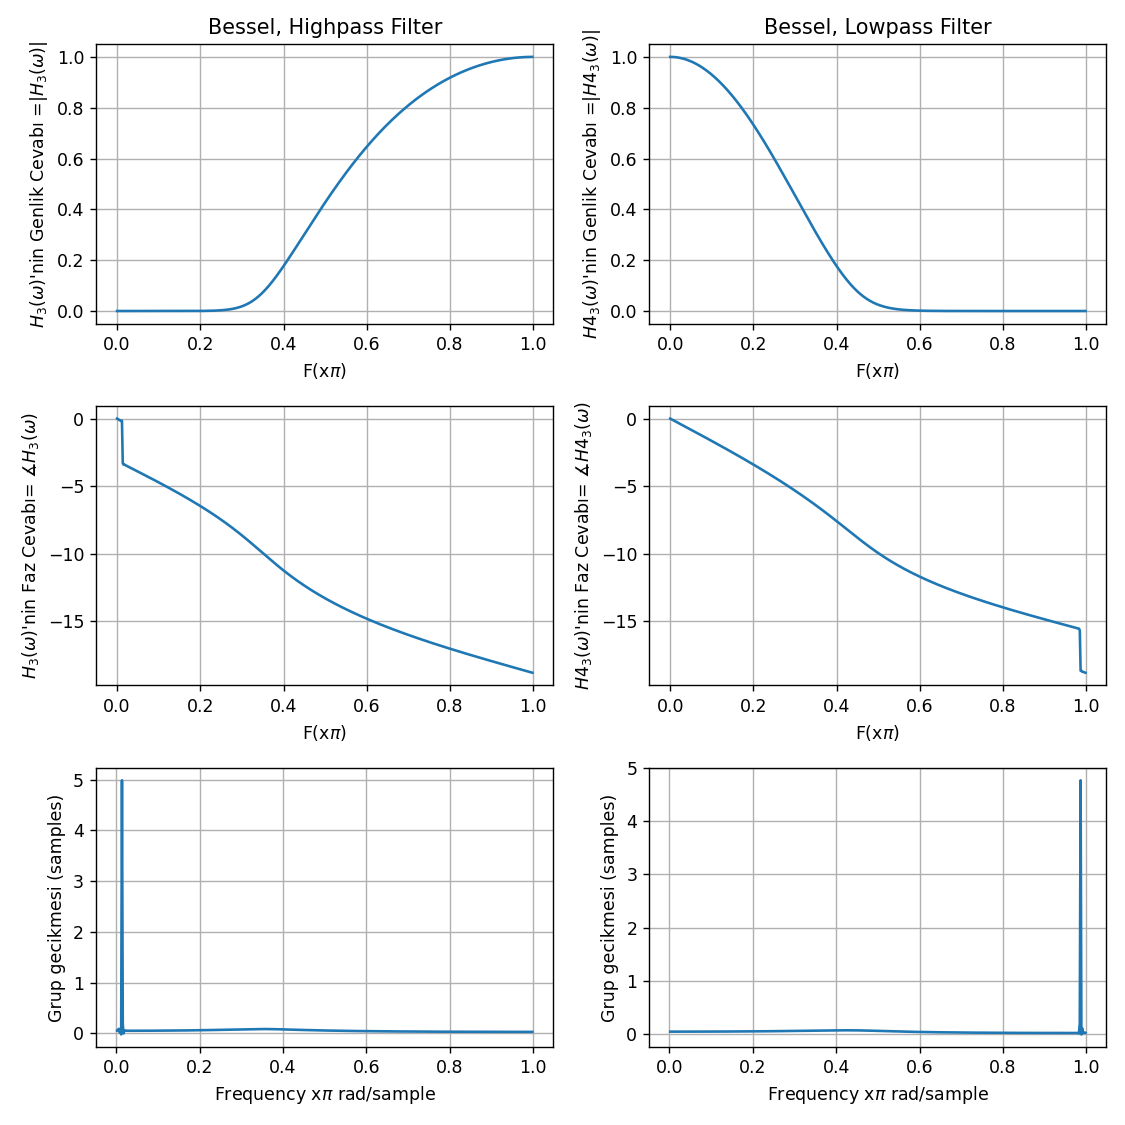

In [35]:
# oluşturduğumuz filtreyi projede açalım;
Be_HPF = loadmat("3_2_Bessel_HPF.mat")
Be_LPF = loadmat("3_2_4_Bessel_HPF.mat")
# katsayılarını alalım (float olarak)
Float_coef_4 = Be_HPF["ba"].astype(np.float)
Float_coef_4_4 = Be_LPF["ba"].astype(np.float)

b_4 = Float_coef_4[0,:]
a_4 = Float_coef_4[1,:]

b_4_4 = Float_coef_4_4[0,:]
a_4_4 = Float_coef_4_4[1,:]

N_4 = 10

w_4, Hw_4=sgnl.freqz(b_4,a_4)       #w domaini ve filtre
Hw_4_abs=abs(Hw_4)                  #genlik cevabı 
Hw_4_pha=np.unwrap(np.angle(Hw_4))  #faz cevabı
tau_w_4= -np.diff(Hw_4_pha)*(N_4/(2*pi)) #grup gecikmesi

w_4_4, Hw_4_4=sgnl.freqz(b_4_4,a_4_4)       #w domaini ve filtre
Hw_4_abs_4=abs(Hw_4_4)                  #genlik cevabı 
Hw_4_pha_4=np.unwrap(np.angle(Hw_4_4))  #faz cevabı
tau_w_4_4= -np.diff(Hw_4_pha_4)*(N_4/(2*pi)) #grup gecikmesi

# filtreyi çizdirelim
plt.figure(figsize=(9,9)) # grafik boyutlarının ayarlanması

plt.subplot(321)   # genlik cevabının çizdirilmesi
plt.plot(w_4/pi,Hw_4_abs)
plt.title("Bessel, Highpass Filter")
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_3$($\omega$)'nin Genlik Cevabı =|$H_3$($\omega$)|")
plt.grid()

plt.subplot(323)   # faz cevabının çizdirilmesi
plt.plot(w_4/pi,Hw_4_pha)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_3$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H_3$($\omega$)")
plt.grid()

plt.subplot(325)   # grup gecikmesi diyagramının çizdirilmesi
plt.plot(w_4[1::]/pi, tau_w_4)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()
#****************************************************************************************
plt.subplot(322)   # genlik cevabının çizdirilmesi
plt.plot(w_4_4/pi,Hw_4_abs_4)
plt.title("Bessel, Lowpass Filter")
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H4_3$($\omega$)'nin Genlik Cevabı =|$H4_3$($\omega$)|")
plt.grid()

plt.subplot(324)   # faz cevabının çizdirilmesi
plt.plot(w_4_4/pi,Hw_4_pha_4)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H4_3$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H4_3$($\omega$)")
plt.grid()

plt.subplot(326)   # grup gecikmesi diyagramının çizdirilmesi
plt.plot(w_4_4[1::]/pi, tau_w_4_4)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()
plt.tight_layout()

YORUM ve ANALİZ:
Soruda istenen iki filtre yapısından diğerini de "bessel" yöntemiyle ve "yüksek geçiren filtre" olacak şekilde seçtim. Burada kullandığım N filtre derecesi ve kesim frekansı gibi değerler filtre başlığında verilmiştir.
    
Aynı şekilde bu değerleri göz önüne alacak olursak, ve -pi/2 ve pi/2 aralığında (F=f/fs=omega/2𝜋) olarak çalıştığımızı düşünürsek;

Genlik spektrumuna baktığımızda; kesim frekansımız 0.2pi seçildiği için biz bu değeri genlik cevabımızda 0.4pi ye karşılık geleceğini görmemiz gerekiyor. Genlik cevabımız incelendiğinde bu değeri görüyoruz. 0-0.4pi aralığındaki frekans değerlerini söndüreceği bunun dışında kalan değerleri ise geçireceğini görüyoruz. Genlik değerimizi 0.4pi-pi aralığına kadar olan kısımı incelediğimizde kesim frekansımıza gelindiğinde genlik değerimiz birden dik bir şekilde yükseliş yaşamamıştır. Yani bu filtre yine ideal filtre gibi değildir ancak burada filtre katsayısı olan N değerini düşük ve N=10 aldığımızı bu yüzden de grup gecikmesi olarak bize daha az gecikme olarak döneceğini unutmamamız gerekir. 

Faz ve Grup gecikmesi grafiklerini inceleyecek olursak, temel anlamda fazımız lineer ve grup gecikmemiz sabittir (ancak faz için FIR filtrelere göre daha az lineer diyebiliriz). Bunun anlamı tüm frekanslarda örnekler aynı şekilde gecikecektir. Lineerliğin bozulduğu ve grup gecikmesinin sabit olmaktan uzaklaştığı bölgeler fazda tam kesim frekansımıza ve grup gecikmesinde filtrelenen bölgelere denk gelmektedir. Bu sayede çıkışa bozulma veya absürt bir gecikme (sinyaller için) görmememiz gerekmektedir.

Ek olarak bu filtre ve yine 3. soruda yaptığım "Butterworth - Lowpass Filter (IIR)" filtresi için genlik değerlerimiz keskin düşüşler ve çıkışlar yaşamadığı için, geçiren bölgelerde maximum frekanstan uzaklaştıkça genlik anlamında bozulmalar göreceğiz bunun sebebi genliğimiz G=1'den hızlı ve ideal olmayan bir düşüş yaşamamızdır.

### Soru - 4

<IPython.core.display.Javascript object>


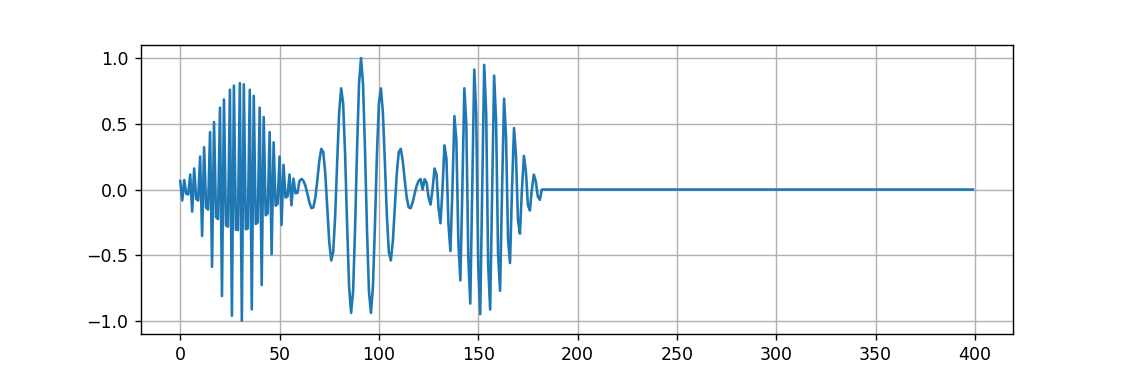

In [16]:
# Örnek2'de verilen işareti tanımlayalım;

N=400   # 400 örneklik dizi
M=60    # pencere boyutu

n=np.arange(0,M+1,1)    #zaman vektörü
wn=0.54-0.46*np.cos(2*pi*n/M)  #hamming penceresi

#frekans bileşenlerimizin pecereleme işlemi yapılarak tanımlanması
x_1=wn*np.cos(0.2*pi*n)        
x_2=wn*np.cos(0.4*pi*n-pi/2)
x_3=wn*np.cos(0.8*pi*n+pi/5)

#soruda verilen frekans bileşeninden oluşan x[n] işaretinin oluşturulması
x_n=np.concatenate((x_3,x_1,x_2, np.zeros(N-3*len(n))), axis=None)
#np.concatenate() komutu, tanımladığımız işaretleri belirli bir eksen üzerinde birleştirmeye yarıyor. 

#x[n] işaretini çizdirelim;

plt.figure(figsize=(9,3))
plt.plot(x_n)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


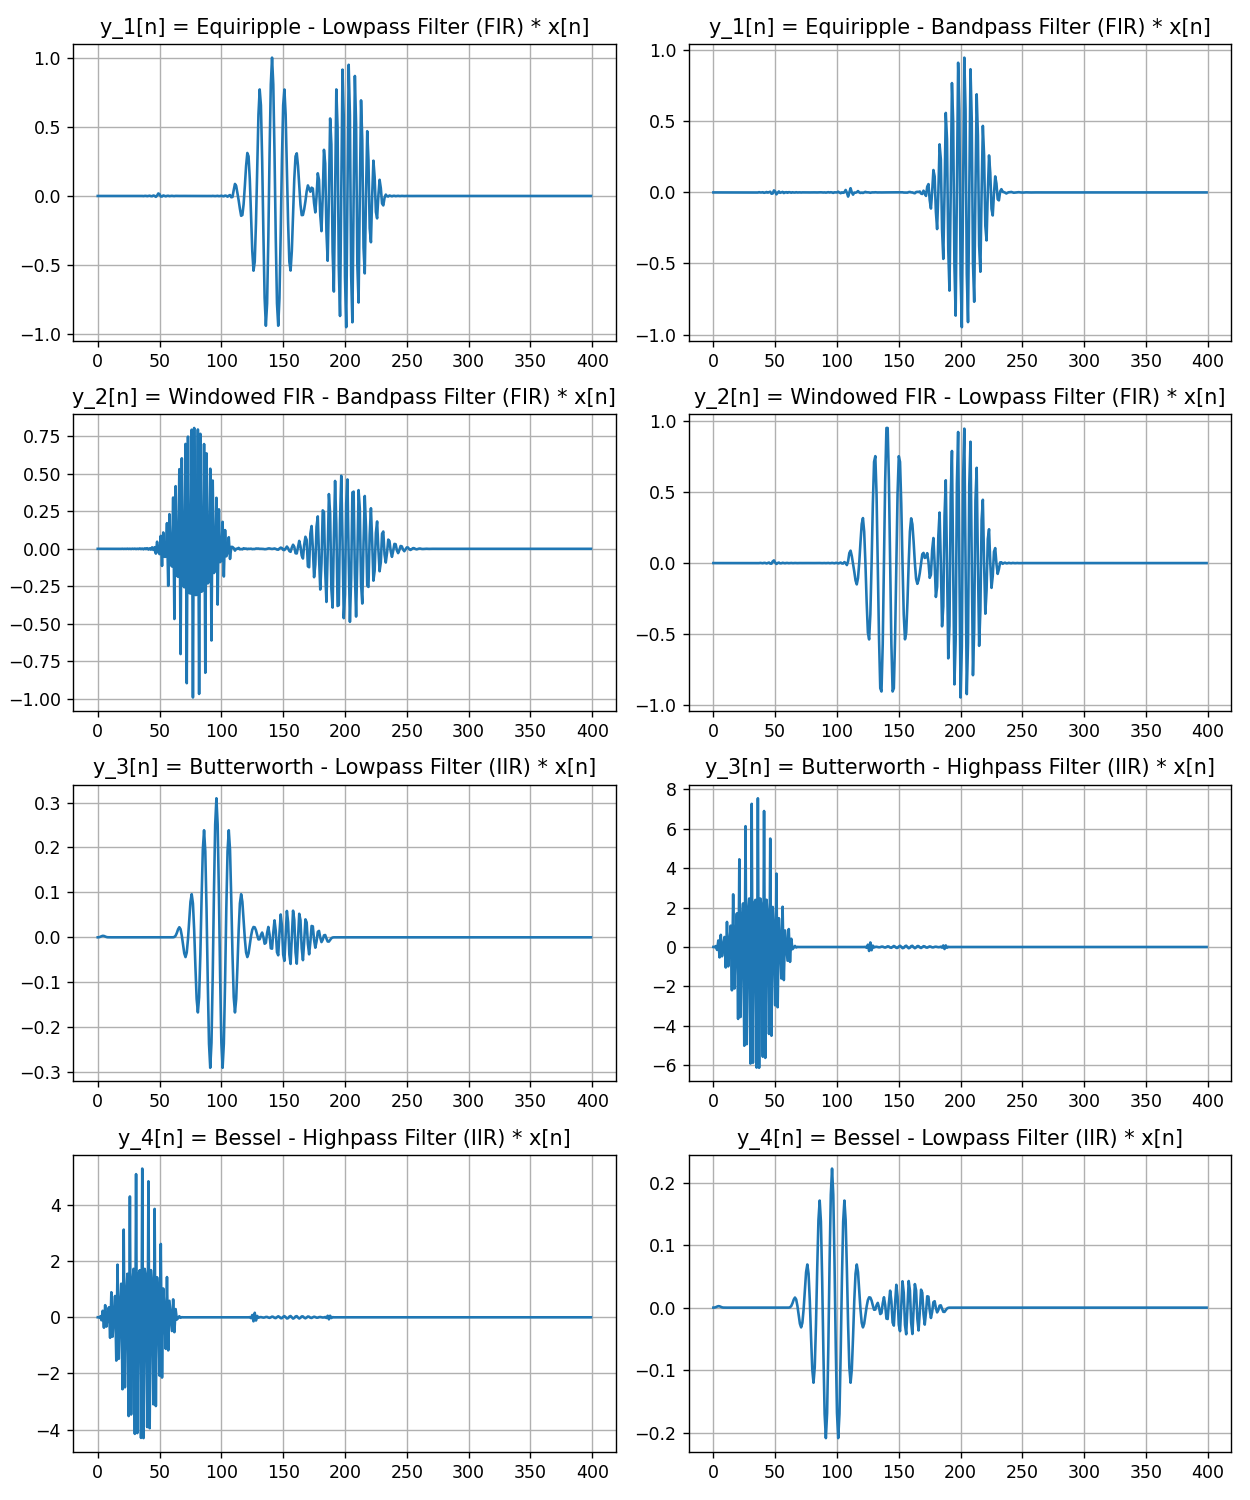

In [38]:
# oluşturduğumuz filtreleri sırası ile giriş işaretine uygulayalım;

yn_1=sgnl.lfilter(b_1,1,x_n) # Equiripple - Lowpass Filter (FIR)
yn_1_1=sgnl.lfilter(b_1_1,1,x_n) # Equiripple - Bandpass Filter (FIR)

yn_2=sgnl.lfilter(b_2,1,x_n) # Windowed FIR - Bandpass Filter (FIR)
yn_2_2=sgnl.lfilter(b_2_2,1,x_n) # Windowed FIR - Lowpass Filter (FIR)

yn_3=sgnl.lfilter(b_3,1,x_n) # Butterworth - Lowpass Filter (IIR)
yn_3_3=sgnl.lfilter(b_3_3,1,x_n) # Butterworth - Highpass Filter (IIR)

yn_4=sgnl.lfilter(b_4,1,x_n) # Bessel - Highpass Filter (IIR)
yn_4_4=sgnl.lfilter(b_4_4,1,x_n) # Bessel - Lowpass Filter (IIR)

#çıkış işaretlerinin çizdirilmesi

plt.figure(figsize=(10,12))

plt.subplot(421)
plt.plot(yn_1)
plt.title("y_1[n] = Equiripple - Lowpass Filter (FIR) * x[n]")
plt.grid()

plt.subplot(422)
plt.plot(yn_1_1)
plt.title("y_1[n] = Equiripple - Bandpass Filter (FIR) * x[n]")
plt.grid()

plt.subplot(423)
plt.plot(yn_2)
plt.title("y_2[n] = Windowed FIR - Bandpass Filter (FIR) * x[n]")
plt.grid()

plt.subplot(424)
plt.plot(yn_2_2)
plt.title("y_2[n] = Windowed FIR - Lowpass Filter (FIR) * x[n]")
plt.grid()

plt.subplot(425)
plt.plot(yn_3)
plt.title("y_3[n] = Butterworth - Lowpass Filter (IIR) * x[n]")
plt.grid()

plt.subplot(426)
plt.plot(yn_3_3)
plt.title("y_3[n] = Butterworth - Highpass Filter (IIR) * x[n]")
plt.grid()

plt.subplot(427)
plt.plot(yn_4)
plt.title("y_4[n] = Bessel - Highpass Filter (IIR) * x[n]")
plt.grid()

plt.subplot(428)
plt.plot(yn_4_4)
plt.title("y_4[n] = Bessel - Lowpass Filter (IIR) * x[n]")
plt.grid()

plt.show()
plt.tight_layout()

YORUMLAR ve CEVAPLAR:
Filtreler uygulanmış çıkışları öncelikle tek tek ele alacak olursak;
    
1 - y_1[n] ve y_1_1[n] = Equiripple - Lowpass ve Bandpass Filter (FIR) * x[n] için:$\\ $
Burada kullandığımız filtre bir "alçak geçiren filtreydi". Çıkıştan görüldüğü üzere yüksek frekanslı işaretimiz burada filtrelenmiştir ve çıkışta görülmemiştir. Diğer işaretlere baktığımızda beklediğimiz üzere genliklerinin korunduğunu söyleyebiliriz ve beklendiği üzere, işaretler (her biri) 50 örnek kadar gecikmiştir. Bu filtrenin beklendiği gibi ve gerçekten ideal bir şekilde çalıştığını söyleyebiliriz. Yapısı gereği alçak geçiren filtre olduğu için beklendiği şekilde 1. (yüksek frekanslı) bileşeni neredeyse pürüssüz bir şekilde filtrelemiştir. Öte yandan bandpass olarak baktığımızda,  şaşırtıcı olmayan bir şekilde giriş işaretimizin iki bileşenini birden filtreleyip orta frekanslı bileşeni bırakmıştır. Keske frekanslarına ve bandına bir de filtrenin genlik spektrumuna bakacak olursak bu beklenen bir sonuç idi.

2 - y_2[n] ve y_2_2[n] = Windowed FIR - Lowpass ve Bandpass Filter (FIR) * x[n] için:$\\ $
Bu sefer elimizde bir bandgeçiren filtre yapısı bulunmakta. 2. Soruya dönüp filtremizi tekrar incelersek, filtrenin 0.4pi-pi aralığını geçirmesi, kalan bandları filtrelemesi gerektiğini görürüz. Çıkışı incelersek, 0.2pi frekanslarında olan x_1[n] işaretimiz filtrelenmiştir. Yukarıda belirtilen filtre aralığını düşününce bu doğal ve beklenen bir sonuçtur. Yine ilgili kısımda genliğimizin korunması gerektiğinde bahsetmiştir, çıkış grafiğini incelersek genliklerin başarıyla korunduğunu tüm işaretler için söyleyemeyiz. Aslında ilgili kısımda filtreyi tekrar inceleyecek olursak bu durum yine beklenen bir durumdur. x_2[n] işareti filtrenin tam kesim frekanslarına gelmektedir; Bu kısımlarda, filtrenin genliği tam olarak 1 değerine ulaşmamıştır. Haliyle işaretimiz genlik olarak bozulmaya uğramıştır, sadece bununla kalmayıp frekans olarak daralmış, yani zamanda genişlemiştir. Bu filtre tasarlanırken işaretimize göre tasarlanmadığı için bu durumun yaşanması doğaldır ancak bu tarz bir giriş için bu filtre yapısı kullanılmamalıdır. Aynı şekilde lowpass olarak da bu filtreyi değerlendirdiğimizde hemen hemen aynı yorumları yapabiliriz. Bu tarz bir giriş için, bu filtrenin uyguladı bozulma çok fazladır. Bu sefer de, yüksek frekanslı bileşen tamamen filtrelenmiş (olması gerektiği gibi) ancak geçiren banttaki bileşenler de bozulmalara uğramıştır. 

3 - y_3[n] ve y_3_3[n] = Butterworth - Lowpass ve Highpass Filter (IIR) * x[n] için:$\\ $
Elimizde bu sefer bir alçak geçiren bir IIR filtre bulunmakta. Bu filtreyle ilgili yukarıda yorum olarak ideal olmadığını söylemiştim. Çıkış sinyalimizi inceleyelim. Çıkışımıza baktığımızda x_1[n] işaretimizin pürüssüz bir şekilde ve çok az bir gecikmeyle (yine ilgili bölümde belirtildiği gibi çıktığını söyleyebilirim; Genlik değerimiz korunmuş ve grup gecikmemiz düşük olduğu için işaret çok az bir gecikmeye uğramıştır. Ancak hemen devamında gelen x_2[n] işaretine baktığımızda durum aynı değildir; İşaret genlikte ve frekansta bozulmuştur hatta neredeyse kaybolmuştur. Açıkcası bu durum beklediğimden biraz daha fazla bozulmayla olmuştur. x_3[n] işaretimiz beklediğimiz üzere tamamen ve pürüssüz bir şekilde filtrelenmiştir. Hatta ilk seferde kullandığımız "Equiripple - LPF"'den daha pürüssüz bir şekilde filtrelendiğini grafiğe bakarak söyleyebiliriz. Butterworth filtre yapısını yüksek geçiren olarak kullandığımızda gecikme ve frekans uzayımızda ideal bir sonuçla karşılaşırken genlik anlamında yine filtre derecesi N ile doğru orantılı bir artış ile karşılaşıyoruz. Butterworth filtresi, genlik olarak dikkat edildiği müddetce yüksek geçiren bir yapıda kullanılması uygun olan bir filtre yapısı olacaktır. Gerçek zamanlı dijital amfi uygulamalarında kullanılabilir.

4 - y_4[n] ve y_4_4[n] = Bessel - Lowpass ve Highpass Filter (IIR) * x[n] için:$\\ $
Bu kez yüksek geçiren bir IIR filtreyi giriş işaretine uyguladık. Burada gözüme çarpan ilk iki şey, beklediğim gibi grup gecikmesinin küçük olmasından dolayı işaretin çok az gecikmesi, ve beklemediğim gibi işaretin genliğinin artması, genlik anlamında bozulmaya uğraması oldu. Aslında genlikte bozulma, ilgili bölümde belirttiğim üzere filtre ideal olmamasından dolayı beklediğim bir durumdu. Ancak genliğin artmasını değil azalmasını bekliyordum. Diğer işaretler verimli bir şekilde ve beklendiği üzere filtrelenmiştir. Son olarak Bessel yöntemiyle alçak geçeren bir filtre yapısı kullandığımızda aynı butterworth filtrenin çıkışını andırıyor. Oradaki yorumların hepsini burası için de kullanabiliriz, bu tarz bir giriş için kullanmaya uygun bir filtre yapısı değildir. 
    

SONUÇ:
Sonuç olarak, her filtrenin beklendiği üzere işini yaptığını söyleyebilirim. Beni şaşırtan durumlar IIR filtre yapılarında beklediğimden biraz daha farklı sonuçlar almamda oldu, butterworthde genlik düşündüğümden daha fazla sönerken, besselde tam tersi düşündüğümden daha fazla artmıştır.
Filtreleri karşılaştırma konusunda öncelikle IIR ve FIR üzerinden yapacak olursam, IIR filtrelerde filtre derecesini küçük almama rağmen filtreleme yaptıkları bölgeleri FIR filtrelere göre daha pürüssüz filtrelemişlerdir ve grup gecikmeleri daha düşüktür, bu durumda sinyali öldürme bakımından daha verimlidir diyebilirim, gerçek zamanlı gürültü azalma sistemlerinde ve maaliyetten kaçılmadığı sistemlerde kullanılabilirler. Ancak mesaj sinyallerimizi taşıyacağımız bir sistemde bu durum tam tersi olacaktır. FIR filtrelerde gözlemlediğim üzere, filtre tasarımı düzgün yapıldığında mesaj işaretinin genliği ve frekansı neredeyse bozulmadan rahatça iletilebilmektedir. Buradaki dez avantajımız ise işaretlerin gecikmeleri IIR filtrelere göre çok daha fazladır. Gerçek zamanlı olmayan uzak haberleşmelerde kullanılmaları uygun olacaktır.

Bu giriş için en verimli filtreyi seçecek olsaydım, ilk olarak kullandığım "Equiripple - Lowpass Filter (FIR)" ve benzer çıkışlar veren "Windowed FIR - Lowpass Filter (FIR)" filtresini/filtrelerini kullanırdım. Yüksek frekansların filtrelenmesi zaten istenen bir durum olsaydı, bu filtre bu iş için verimli bir filtre olurdu. Tam dersi bir durumda sadece yüksek frekansları geçirmek istediğim farklı bir uygulama isteseydim, bu zaman kullanacağım filtre "Bessel - Lowpass Filter (IIR)" olurdu. Çünkü bu devre istediğim yüksek frekansları (frekans anlamında) bozmadan ve gecikmeyi çok az yaparak geçirebiliyor, ve butterworth filtre yapısına göre gain anlamında bozulmamız (pozitif veya negatif yönde) neredeyse yarısı kadar bir durumda..
Ancak daha kapsamlı bir test yapsaydık, filtre seçimi zorlaşabilirdi. Mesela bir gerçek zamanlı bir müzik sistemi için yukarıda kullanılan tüm filtreler sınıfta kalacaktı. 

Filtre derecelerin etkisi gözlemlediğim kadarıyla ideale yaklaşmak oldu, ancak burada işlem yükü eksponansiyel bir şekilde artmaktır, hatta pydfa proğramı IIR filtreler için 50,100 gibi filtre derecelerini çok yüksek bulmakta ve uyarı vermektedir. Derece arttıkça işlem yükü artmaktadır. Bu kadar işlem, belki de dijital bir elektro gitar amfisi yapacağımız bir projede gitar amfisinin yükseltme ve efektleme işlevini etkileyecek olup gürültü engellemesi yaparken düzgün tonlama alamamamıza kadar gidecek, bunu çözelim derken daha pahalı ekipmanlar (örneğin hafızası ve işlemcisi daha kuvvetli ) kullanalım diyice de piyasa üzerinde diğer markaların altına düşmeye yol açacak kadar sıkıntıya yol açacaktır... 

### Ödev Sonu